In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Data Exploration
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


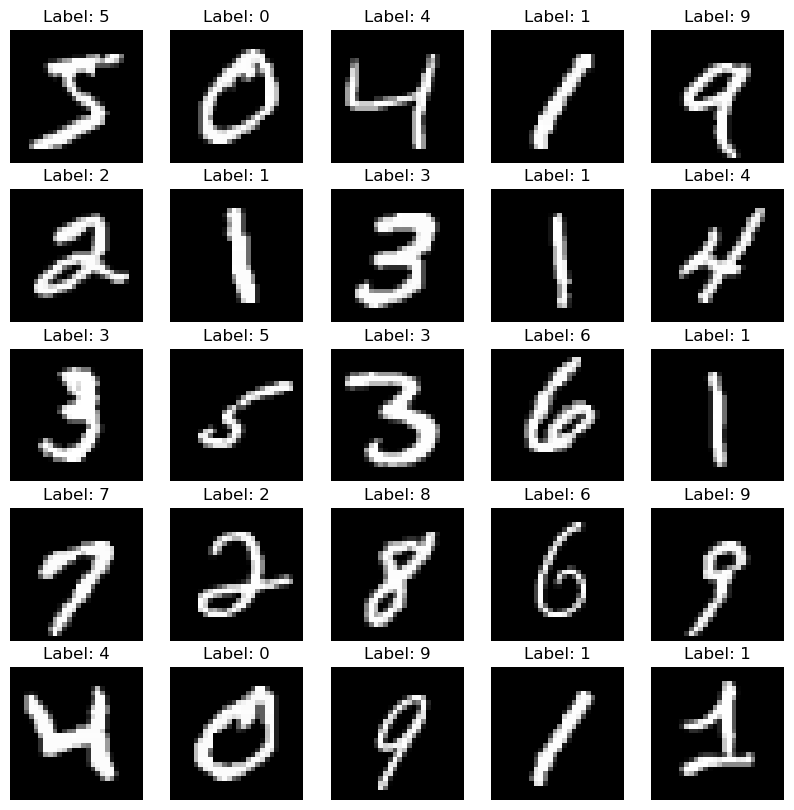

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [4]:
# Data Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution:")
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

Class Distribution:
Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples


In [6]:
# Model Building
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Define input shape explicitly
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Model Training
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.9092 - loss: 0.3035 - val_accuracy: 0.9811 - val_loss: 0.0580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9851 - loss: 0.0496 - val_accuracy: 0.9815 - val_loss: 0.0531
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9909 - loss: 0.0298 - val_accuracy: 0.9848 - val_loss: 0.0428
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 18ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9855 - val_loss: 0.0448
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9864 - val_loss: 0.0461


In [8]:
# Model Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 4ms/step - accuracy: 0.9864 - loss: 0.0461

Test accuracy: 0.9864000082015991


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


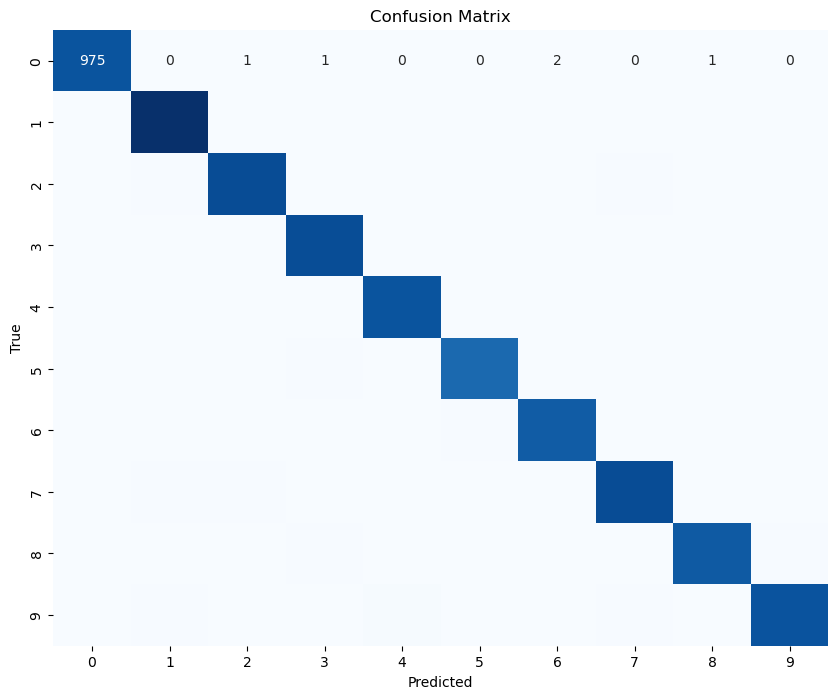

In [9]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
###MODEL COMPARISION

In [10]:
# Build and Evaluate Different Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [12]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the subset size
subset_size = 1000  # Adjust this value as needed

# Creating an SVM model
svm_model = SVC()

# Fitting the SVM model on a subset of training data
svm_model.fit(x_train[:subset_size].reshape(-1, 28*28), y_train[:subset_size])

# Making predictions on the test data
svm_pred = svm_model.predict(x_test.reshape(-1, 28*28))

# Calculating accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9083


In [13]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train.reshape(-1, 28*28), y_train)
rf_pred = rf_model.predict(x_test.reshape(-1, 28*28))
rf_accuracy = accuracy_score(y_test, rf_pred)

In [15]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train.reshape(-1, 28*28), y_train)
knn_pred = knn_model.predict(x_test.reshape(-1, 28*28))
knn_accuracy = accuracy_score(y_test, knn_pred)

In [17]:
from tensorflow.keras import layers, models

# Define the CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

C:\Users\madha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8615 - loss: 0.4455 - val_accuracy: 0.9828 - val_loss: 0.0526
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9823 - loss: 0.0553 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9892 - loss: 0.0342 - val_accuracy: 0.9874 - val_loss: 0.0368
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9894 - val_loss: 0.0306
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9920 - loss: 0.0235 - val_accuracy: 0.9909 - val_loss: 0.0258
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9883 - loss: 0.0319
Test Accuracy: 0.9908999800682068


In [20]:
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
cnn_accuracy = cnn_model.evaluate(x_test, y_test, verbose=0)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

# Select the Best Model
best_model = max([(svm_accuracy, "SVM"), (knn_accuracy, "KNN"), (rf_accuracy, "Random Forest"),(cnn_accuracy,"CNN")])
print("Best Model:", best_model[1])

SVM Accuracy: 0.9083
KNN Accuracy: 0.9688
Random Forest Accuracy: 0.9697
CNN Accuracy: 0.9908999800682068
Best Model: CNN
